# WiDS Assignment


**Welcome to your EDA assignment ! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**

This assignment is expected to be completed in Jupyter notebooks or Google Colab and submitted as an ipynb file.


### 1) Start by importing all important libraries
For eg, "import numpy as np"

Import numpy, matplotlib, seaborn, pandas and any others that you require.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# to access dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) Read the csv file and assign it to a variable . 

In [ ]:
total_data = pd.read_csv('/content/drive/MyDrive/pokemon_dataset.csv')
total_data.head()                          # to display first 5 rows

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 3) Display shape of dataframe
Expected Output - (800, 13)

In [ ]:
total_data.shape

(800, 13)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [ ]:
total_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### 5) Remove the column '#' and update the dataframe.

In [ ]:
# axis is 1 for specifying to drop a column
# inplace value is true to update the dataframe
total_data.drop('#', axis=1, inplace=True)
total_data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


###  7) Print a list of all the unique Type-1 powers

In [ ]:
total_data['Type 1'].drop_duplicates()

0         Grass
4          Fire
9         Water
13          Bug
20       Normal
28       Poison
30     Electric
32       Ground
40        Fairy
61     Fighting
68      Psychic
80         Rock
99        Ghost
133         Ice
159      Dragon
212        Dark
223       Steel
702      Flying
Name: Type 1, dtype: object

### 1. How many pokemons have 'Mega' in their name?

In [ ]:
len(total_data[ total_data['Name'].str.contains('Mega') == True ])

# total_data['Name'].str.contains('Mega') == True to check if the name contains 'Mega'
# total_data[ total_data['Name'].str.contains('Mega') == True ] to find all such rows of total_data
# len() to return its length which is same as the number of pokemons having 'Mega' in their name

49

### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [ ]:
total_data['Sp. Def'].std()

27.82891579711745

### 3. What percentage (upto 3 decimal places) of pokemons are legendary ? 

In [ ]:
len(total_data[total_data.Legendary == True])/ len(total_data)*100

# total_data.Legendary == True to check if 'Legendary' column is True
# total_data[total_data.Legendary == True] to find all such rows of total_data
# len() to return its length which is same as the number of pokemons that are legendary
# / len(total_data)*100 for percentage calculation

8.125

**Now that you have imported the dataset and libraries, and answered some basic questions, you can move on to the visualizations and some intermediate statistics !**

### Discrete variables:
a. For each variable, plot the frequency of each unique value (histogram).

b. For each variable, identify the mode value.

In [ ]:
# printing all unique values of each column to find the discrete variables
# the columns with relatively lesser unique values are discrete

for column in total_data.columns:
  print(total_data[column].drop_duplicates())

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object
0         Grass
4          Fire
9         Water
13          Bug
20       Normal
28       Poison
30     Electric
32       Ground
40        Fairy
61     Fighting
68      Psychic
80         Rock
99        Ghost
133         Ice
159      Dragon
212        Dark
223       Steel
702      Flying
Name: Type 1, dtype: object
0        Poison
4           NaN
6        Flying
7        Dragon
36       Ground
44        Fairy
51        Grass
67     Fighting
85      Psychic
88        Steel
94          Ice
119        Rock
141        Dark
149       Water
184    Electric
246        Fire
316       Ghost
379         Bug
735      Normal
Name: Type 2, dtype: o

**I used bar plots instead of histograms.** The reason is because some of the column entries are words and were easier to interpret horizontally. Also since the plots are for 'discrete' columns, histograms don't add any difference in information than the bar plots.

Mode: Water


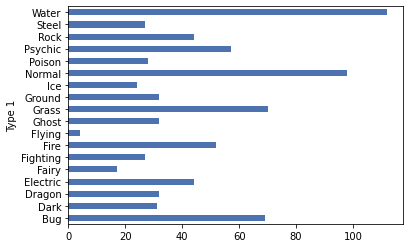

In [ ]:
discrete_col = ['Type 1', 'Type 2', 'Generation', 'Legendary']   # obtained from the output of the previous code cell

plt.style.use('seaborn-deep')

# Type-1
total_data.groupby('Type 1').size().plot(kind='barh')    # part a
print('Mode: %s' %total_data['Type 1'].mode()[0])    # part b

Mode: Flying


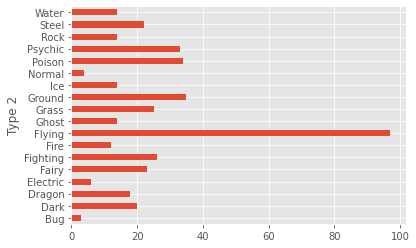

In [ ]:
plt.style.use('ggplot')

# Type-2
total_data.groupby('Type 2').size().plot(kind='barh')    # part a
print('Mode: %s' %total_data['Type 2'].mode()[0])    # part b

Mode: 1


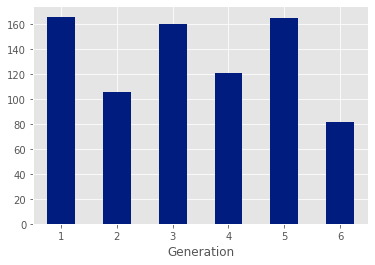

In [ ]:
plt.style.use('seaborn-dark-palette')

# Generation
total_data.groupby('Generation').size().plot(kind='bar')
plt.xticks(rotation=0)    # part a
print('Mode: %s' %total_data['Generation'].mode()[0])    # part b

Mode: False


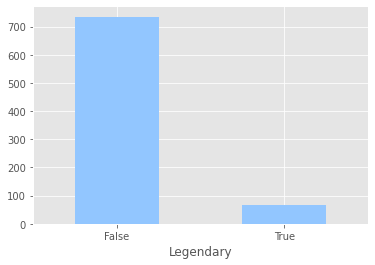

In [ ]:
plt.style.use('seaborn-pastel')

# Legendary
total_data.groupby('Legendary').size().plot(kind='bar')
plt.xticks(rotation=0)    # part a
print('Mode: %s' %total_data['Legendary'].mode()[0])    # part b

### Continuous variables:

(Define a function for parts 'a' and 'b' which will accept feature name as input and print/plot required quantities as output. This will save time)

a. For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75th percentile, and inter-quartile range.

b. For each variable, plot box-and-whiskers plots.

c. For each variable, plot the histogram. (do this manually for each feature and adjust the number of bins)

d. For any 2 continuous variables, plot the QQ plot. Read online about how it is interpreted.



In [ ]:
def func_ab(col):     # function a and b parts
  print('Column         :%s'%col)
  print('Mean           :%s'%total_data[col].mean())
  print('Variance       :%s'%total_data[col].var())
  print('Skew           :%s'%total_data[col].skew())
  print('Min            :%s'%min(total_data[col]))
  print('Max            :%s'%max(total_data[col]))
  print('Median         :%s'%total_data[col].median())
  print('25th percentile:%s'%total_data[col].quantile(0.25))
  print('75th percentile:%s'%total_data[col].quantile(0.75))
  print('Inter-quartile :%s'%(total_data[col].quantile(0.75)-total_data[col].quantile(0.25)))
  plt.style.use('ggplot')
  total_data.boxplot(column = col)
  plt.show()
  print('\n')

Column         :Total
Mean           :435.1025
Variance       :14391.130907384233
Skew           :0.1525299233953993
Min            :180
Max            :780
Median         :450.0
25th percentile:330.0
75th percentile:515.0
Inter-quartile :185.0


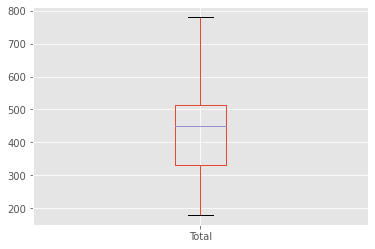



Column         :HP
Mean           :69.25875
Variance       :652.0193225907373
Skew           :1.5682243758418617
Min            :1
Max            :255
Median         :65.0
25th percentile:50.0
75th percentile:80.0
Inter-quartile :30.0


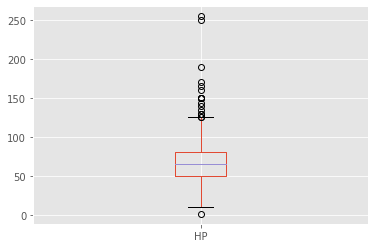



Column         :Attack
Mean           :79.00125
Variance       :1053.4805991864816
Skew           :0.5516137480269772
Min            :5
Max            :190
Median         :75.0
25th percentile:55.0
75th percentile:100.0
Inter-quartile :45.0


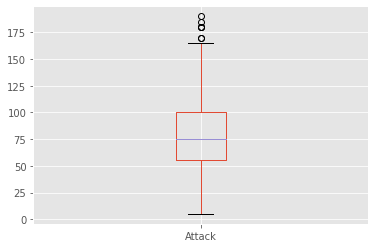



Column         :Defense
Mean           :73.8425
Variance       :972.410707133917
Skew           :1.1559123029560856
Min            :5
Max            :230
Median         :70.0
25th percentile:50.0
75th percentile:90.0
Inter-quartile :40.0


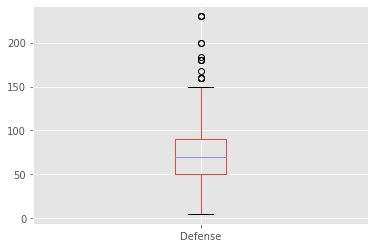



Column         :Sp. Atk
Mean           :72.82
Variance       :1070.748535669585
Skew           :0.7446624978300574
Min            :10
Max            :194
Median         :65.0
25th percentile:49.75
75th percentile:95.0
Inter-quartile :45.25


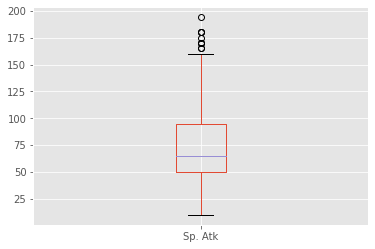



Column         :Sp. Def
Mean           :71.9025
Variance       :774.4485544430531
Skew           :0.8540186115468782
Min            :20
Max            :230
Median         :70.0
25th percentile:50.0
75th percentile:90.0
Inter-quartile :40.0


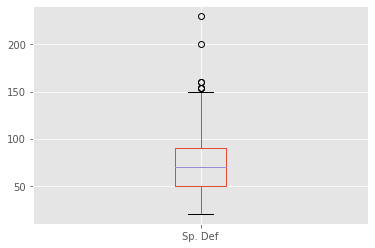



Column         :Speed
Mean           :68.2775
Variance       :844.5111326658338
Skew           :0.35793329506082994
Min            :5
Max            :180
Median         :65.0
25th percentile:45.0
75th percentile:90.0
Inter-quartile :45.0


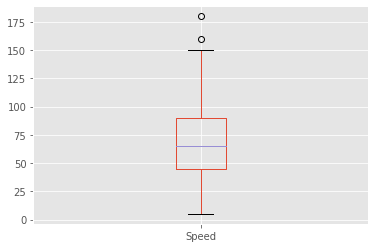

In [ ]:
for column in total_data.columns:
  if column in discrete_col:    # all columns except the discrete ones are continuous
    continue
  elif column == 'Name':        # ignoring the Name column
    continue
  func_ab(column)

Text(0.5, 1.0, 'Total')

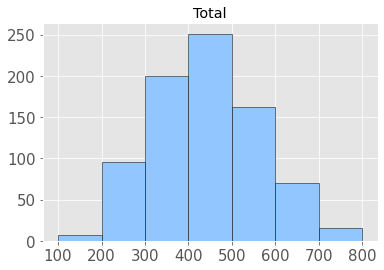

In [ ]:
# c part
# Total                        
plt.style.use('seaborn-pastel')
bins = [100,200,300,400,500,600,700,800]
total_data['Total'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=bins)
plt.title('Total')

Text(0.5, 1.0, 'HP')

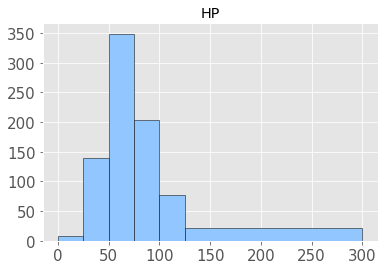

In [ ]:
# c part
# HP                        
plt.style.use('seaborn-pastel')
bins = [0,25,50,75,100,125,300]       # irregular bins to show the 'densely' centered values
total_data['HP'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins= bins)
plt.title('HP')

Text(0.5, 1.0, 'Attack')

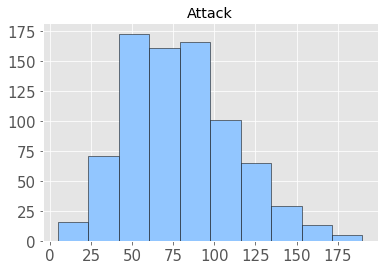

In [ ]:
# c part
# Attack                        
plt.style.use('seaborn-pastel')
total_data['Attack'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=10)
plt.title('Attack')

Text(0.5, 1.0, 'Defense')

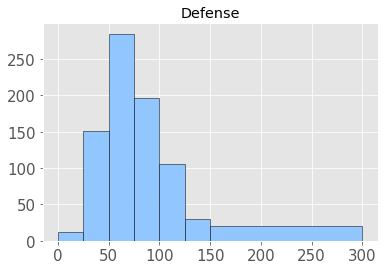

In [ ]:
# c part
# Defense                        
plt.style.use('seaborn-pastel')
bins = [0,25,50,75,100,125,150,300]       # irregular bins to show the 'densely' centered values
total_data['Defense'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=bins)
plt.title('Defense')

Text(0.5, 1.0, 'Sp. Atk')

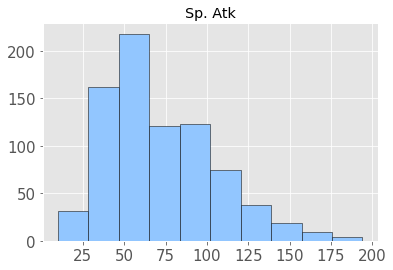

In [ ]:
# c part
# Sp. Atk                        
plt.style.use('seaborn-pastel')
total_data['Sp. Atk'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=10)
plt.title('Sp. Atk')

Text(0.5, 1.0, 'Sp. Def')

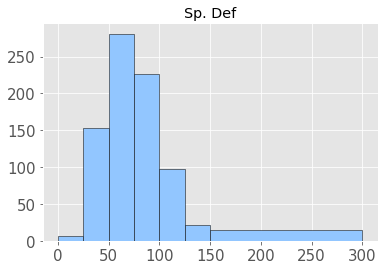

In [ ]:
# c part
# Sp. Def                        
plt.style.use('seaborn-pastel')
bins = [0,25,50,75,100,125,150,300]       # irregular bins to show the 'densely' centered values
total_data['Sp. Def'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=bins)
plt.title('Sp. Def')

Text(0.5, 1.0, 'Speed')

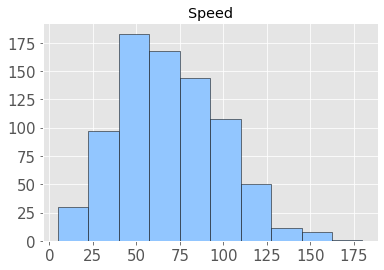

In [ ]:
# c part
# Speed                        
plt.style.use('seaborn-pastel')
total_data['Speed'].hist(edgecolor='black', xlabelsize=15, ylabelsize=15, bins=10)
plt.title('Speed')

The most fundamental question answered by Q-Q plot is:
*Is this curve Normally Distributed?*

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


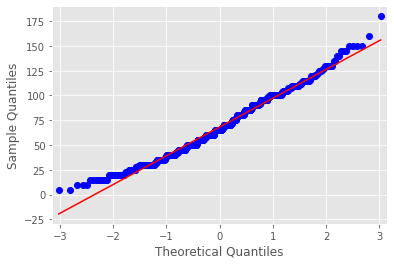

In [ ]:
import statsmodels.api as sm          # for qq plot (d part)
import pylab as py

sm.qqplot(total_data['Speed'], line ='s')  # question says for any two columns, 1st chosen column is 'Speed'
py.show()

# line = “s” - standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them

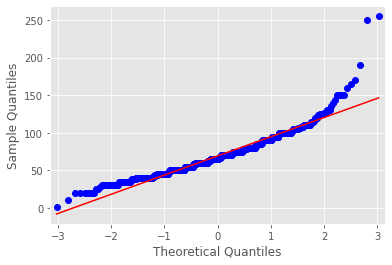

In [ ]:
sm.qqplot(total_data['HP'], line ='s')  # question says for any two columns, 2nd chosen column is 'HP'
py.show()

### Pairwise interactions

a. Pick any two discrete-continuous pairs, and plot box-and-whiskers plot for the continuous variable side-by-side for each value of the discrete variable.

b. Plot a heatmap of correlation between all pairs of continuous variables. Use seaborn for this.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


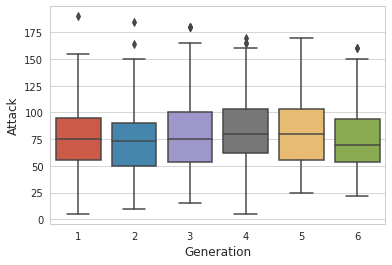

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
        
sns.boxplot('Generation', 'Attack', data=total_data) # part a, discrete column = 'Generation', continuous = 'Attack'
plt.xlabel('Generation')     # Set text for the x axis
plt.ylabel('Attack')   # Set text for y axis
plt.show()

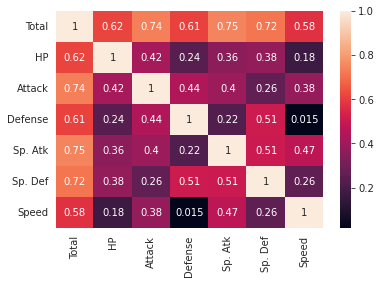

In [ ]:
df = total_data.drop(['Name','Type 1','Type 2','Generation','Legendary'],axis=1)      # Creating a dataframe containing only the continuous columns
sns.heatmap(df.corr(),annot=True)                # part b, annot = True for displaying the correlation values